In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
#Classification

In [3]:

df = pd.read_csv('data/user_visit_duration.csv')

In [4]:
df.head()


,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


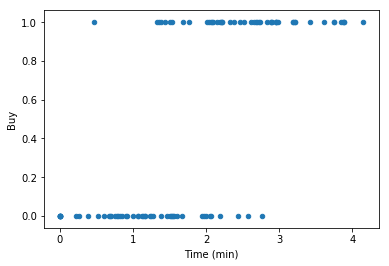

In [5]:
df.plot(kind='scatter', x='Time (min)', y='Buy')


In [6]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))


In [7]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s - loss: 0.9017 - acc: 0.4000     
Epoch 2/25
100/100 [==============================] - 0s - loss: 0.6313 - acc: 0.6000     
Epoch 3/25
100/100 [==============================] - 0s - loss: 0.5849 - acc: 0.6400     
Epoch 4/25
100/100 [==============================] - 0s - loss: 0.5702 - acc: 0.6600     
Epoch 5/25
100/100 [==============================] - 0s - loss: 0.5311 - acc: 0.7500     
Epoch 6/25
100/100 [==============================] - 0s - loss: 0.5686 - acc: 0.7100     
Epoch 7/25
100/100 [==============================] - 0s - loss: 0.5018 - acc: 0.8500     
Epoch 8/25
100/100 [==============================] - 0s - loss: 0.5017 - acc: 0.7700     
Epoch 9/25
100/100 [==============================] - 0s - loss: 0.4983 - acc: 0.7600     
Epoch 10/25
100/100 [==============================] - 0s - loss: 0.4669 - acc: 0.8200     
Epoch 11/25
100/100 [==============================] - 0s - loss: 0.4602 - acc: 0.8100   

array([ 0.        ,  0.08163265,  0.16326531,  0.24489796,  0.32653061,
        0.40816327,  0.48979592,  0.57142857,  0.65306122,  0.73469388,
        0.81632653,  0.89795918,  0.97959184,  1.06122449,  1.14285714,
        1.2244898 ,  1.30612245,  1.3877551 ,  1.46938776,  1.55102041,
        1.63265306,  1.71428571,  1.79591837,  1.87755102,  1.95918367,
        2.04081633,  2.12244898,  2.20408163,  2.28571429,  2.36734694,
        2.44897959,  2.53061224,  2.6122449 ,  2.69387755,  2.7755102 ,
        2.85714286,  2.93877551,  3.02040816,  3.10204082,  3.18367347,
        3.26530612,  3.34693878,  3.42857143,  3.51020408,  3.59183673,
        3.67346939,  3.75510204,  3.83673469,  3.91836735,  4.        ])

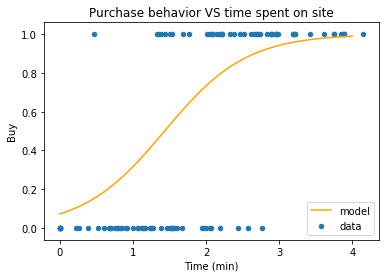

In [11]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])
temp


In [12]:
temp_class = model.predict(temp) > 0.5


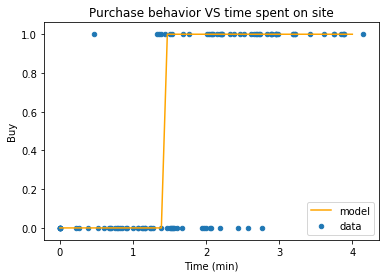

In [13]:

ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [14]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [16]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))


The accuracy score is 0.790


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [20]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))


The accuracy score is 0.790


In [21]:
model.fit(X_train, y_train, epochs=25, verbose=0)


In [22]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.800
The test accuracy score is 0.950


In [23]:
from keras.wrappers.scikit_learn import KerasClassifier

In [24]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [25]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [26]:
from sklearn.model_selection import cross_val_score, KFold

In [31]:
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)
scores

array([ 0.76470588,  0.81818182,  0.84848485])

In [32]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8105 ± 0.0346


In [33]:
from sklearn.metrics import confusion_matrix


In [34]:
confusion_matrix(y, y_class_pred)


array([[33, 17],
       [ 4, 46]])

In [37]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [38]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])


,Predicted Not Buy,Predicted Buy
Not Buy,33,17
Buy,4,46


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [40]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.730
Recall:  	0.920
F1 Score:	0.814


In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.89      0.66      0.76        50
          1       0.73      0.92      0.81        50

avg / total       0.81      0.79      0.79       100

